## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  10.456636  1249.324185  0.507946   4.212233  634.901811
1   8.890635  1055.196693  0.874327  10.361273  922.571309
2  19.115302  1332.924814  0.722087  10.733985  962.665933
3  57.291648  1478.373318  0.423653   4.641125  628.994698
4  50.346814  1716.243468  0.213527   2.917338  369.943380


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0029427	total: 56.3ms	remaining: 56.2s
1:	learn: 0.9907524	total: 56.9ms	remaining: 28.4s
2:	learn: 0.9813111	total: 57.3ms	remaining: 19.1s
3:	learn: 0.9705623	total: 57.8ms	remaining: 14.4s
4:	learn: 0.9586763	total: 58.3ms	remaining: 11.6s
5:	learn: 0.9473961	total: 58.8ms	remaining: 9.75s
6:	learn: 0.9351426	total: 59.3ms	remaining: 8.41s
7:	learn: 0.9247477	total: 59.8ms	remaining: 7.41s
8:	learn: 0.9112409	total: 60.4ms	remaining: 6.65s
9:	learn: 0.8980306	total: 60.9ms	remaining: 6.02s
10:	learn: 0.8868104	total: 61.2ms	remaining: 5.51s
11:	learn: 0.8747903	total: 61.7ms	remaining: 5.08s
12:	learn: 0.8641628	total: 62.3ms	remaining: 4.73s
13:	learn: 0.8514410	total: 62.8ms	remaining: 4.42s
14:	learn: 0.8411066	total: 63.3ms	remaining: 4.15s
15:	learn: 0.8327097	total: 63.7ms	remaining: 3.91s
16:	learn: 0.8220654	total: 64.1ms	remaining: 3.71s
17:	learn: 0.8124416	total: 64.6ms	remaining: 3.52s
18:	learn: 0.8057497	total: 65ms	remaining: 

109:	learn: 0.2949609	total: 107ms	remaining: 862ms
110:	learn: 0.2918860	total: 107ms	remaining: 857ms
111:	learn: 0.2889100	total: 107ms	remaining: 852ms
112:	learn: 0.2861385	total: 108ms	remaining: 846ms
113:	learn: 0.2835999	total: 108ms	remaining: 840ms
114:	learn: 0.2813130	total: 108ms	remaining: 834ms
115:	learn: 0.2788973	total: 109ms	remaining: 830ms
116:	learn: 0.2755652	total: 109ms	remaining: 825ms
117:	learn: 0.2724483	total: 110ms	remaining: 821ms
118:	learn: 0.2699408	total: 110ms	remaining: 816ms
119:	learn: 0.2671413	total: 111ms	remaining: 811ms
120:	learn: 0.2640695	total: 111ms	remaining: 806ms
121:	learn: 0.2609856	total: 112ms	remaining: 803ms
122:	learn: 0.2590091	total: 112ms	remaining: 798ms
123:	learn: 0.2562825	total: 112ms	remaining: 794ms
124:	learn: 0.2541246	total: 113ms	remaining: 790ms
125:	learn: 0.2513156	total: 113ms	remaining: 786ms
126:	learn: 0.2493790	total: 114ms	remaining: 782ms
127:	learn: 0.2471211	total: 114ms	remaining: 777ms
128:	learn: 

291:	learn: 0.0717119	total: 186ms	remaining: 450ms
292:	learn: 0.0712511	total: 186ms	remaining: 449ms
293:	learn: 0.0707605	total: 187ms	remaining: 448ms
294:	learn: 0.0704149	total: 188ms	remaining: 448ms
295:	learn: 0.0701403	total: 188ms	remaining: 447ms
296:	learn: 0.0696777	total: 188ms	remaining: 446ms
297:	learn: 0.0693723	total: 189ms	remaining: 445ms
298:	learn: 0.0689692	total: 189ms	remaining: 444ms
299:	learn: 0.0685375	total: 190ms	remaining: 442ms
300:	learn: 0.0681007	total: 190ms	remaining: 441ms
301:	learn: 0.0676056	total: 190ms	remaining: 440ms
302:	learn: 0.0670997	total: 191ms	remaining: 439ms
303:	learn: 0.0666881	total: 191ms	remaining: 438ms
304:	learn: 0.0664024	total: 192ms	remaining: 437ms
305:	learn: 0.0659381	total: 192ms	remaining: 436ms
306:	learn: 0.0656984	total: 193ms	remaining: 435ms
307:	learn: 0.0654262	total: 193ms	remaining: 434ms
308:	learn: 0.0650103	total: 193ms	remaining: 432ms
309:	learn: 0.0647760	total: 194ms	remaining: 431ms
310:	learn: 

532:	learn: 0.0261168	total: 288ms	remaining: 252ms
533:	learn: 0.0260466	total: 289ms	remaining: 252ms
534:	learn: 0.0260073	total: 289ms	remaining: 251ms
535:	learn: 0.0258697	total: 289ms	remaining: 251ms
536:	learn: 0.0258287	total: 290ms	remaining: 250ms
537:	learn: 0.0257230	total: 290ms	remaining: 249ms
538:	learn: 0.0256157	total: 291ms	remaining: 249ms
539:	learn: 0.0255443	total: 292ms	remaining: 248ms
540:	learn: 0.0254807	total: 292ms	remaining: 248ms
541:	learn: 0.0253821	total: 292ms	remaining: 247ms
542:	learn: 0.0252495	total: 293ms	remaining: 246ms
543:	learn: 0.0251807	total: 293ms	remaining: 246ms
544:	learn: 0.0251192	total: 294ms	remaining: 245ms
545:	learn: 0.0250525	total: 294ms	remaining: 244ms
546:	learn: 0.0249576	total: 294ms	remaining: 244ms
547:	learn: 0.0248542	total: 295ms	remaining: 243ms
548:	learn: 0.0247949	total: 295ms	remaining: 243ms
549:	learn: 0.0247307	total: 296ms	remaining: 242ms
550:	learn: 0.0246292	total: 296ms	remaining: 241ms
551:	learn: 

716:	learn: 0.0140735	total: 367ms	remaining: 145ms
717:	learn: 0.0140399	total: 368ms	remaining: 144ms
718:	learn: 0.0140052	total: 368ms	remaining: 144ms
719:	learn: 0.0139425	total: 368ms	remaining: 143ms
720:	learn: 0.0139216	total: 369ms	remaining: 143ms
721:	learn: 0.0138875	total: 369ms	remaining: 142ms
722:	learn: 0.0138289	total: 370ms	remaining: 142ms
723:	learn: 0.0138069	total: 370ms	remaining: 141ms
724:	learn: 0.0137851	total: 371ms	remaining: 141ms
725:	learn: 0.0137528	total: 371ms	remaining: 140ms
726:	learn: 0.0137022	total: 372ms	remaining: 140ms
727:	learn: 0.0136689	total: 372ms	remaining: 139ms
728:	learn: 0.0136092	total: 373ms	remaining: 139ms
729:	learn: 0.0135524	total: 373ms	remaining: 138ms
730:	learn: 0.0135312	total: 374ms	remaining: 138ms
731:	learn: 0.0135103	total: 374ms	remaining: 137ms
732:	learn: 0.0134896	total: 375ms	remaining: 137ms
733:	learn: 0.0134587	total: 375ms	remaining: 136ms
734:	learn: 0.0134264	total: 376ms	remaining: 135ms
735:	learn: 

952:	learn: 0.0078700	total: 470ms	remaining: 23.2ms
953:	learn: 0.0078407	total: 471ms	remaining: 22.7ms
954:	learn: 0.0078122	total: 471ms	remaining: 22.2ms
955:	learn: 0.0077811	total: 472ms	remaining: 21.7ms
956:	learn: 0.0077630	total: 472ms	remaining: 21.2ms
957:	learn: 0.0077384	total: 472ms	remaining: 20.7ms
958:	learn: 0.0077081	total: 473ms	remaining: 20.2ms
959:	learn: 0.0076901	total: 473ms	remaining: 19.7ms
960:	learn: 0.0076727	total: 474ms	remaining: 19.2ms
961:	learn: 0.0076465	total: 474ms	remaining: 18.7ms
962:	learn: 0.0076291	total: 475ms	remaining: 18.2ms
963:	learn: 0.0076075	total: 475ms	remaining: 17.7ms
964:	learn: 0.0075877	total: 476ms	remaining: 17.3ms
965:	learn: 0.0075747	total: 476ms	remaining: 16.8ms
966:	learn: 0.0075483	total: 476ms	remaining: 16.3ms
967:	learn: 0.0075355	total: 477ms	remaining: 15.8ms
968:	learn: 0.0075127	total: 477ms	remaining: 15.3ms
969:	learn: 0.0074773	total: 478ms	remaining: 14.8ms
970:	learn: 0.0074651	total: 478ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

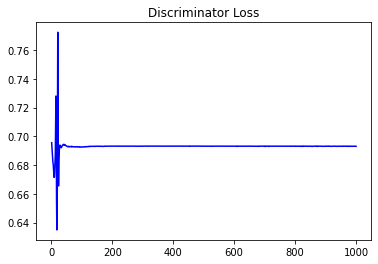

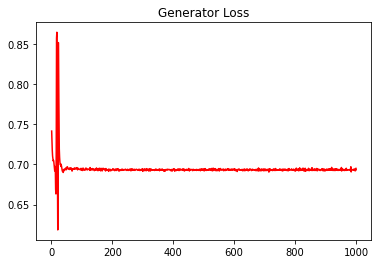

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.02508794327279601


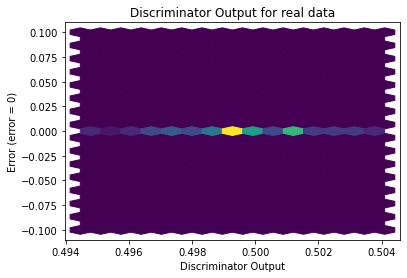

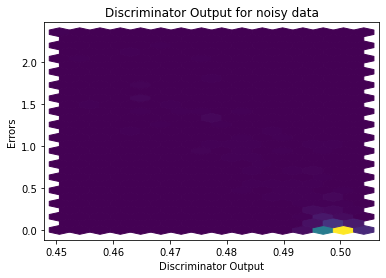

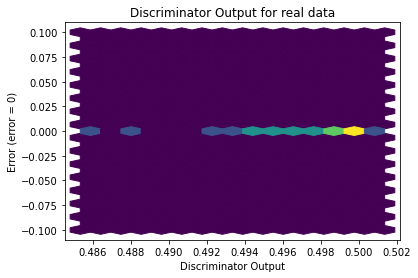

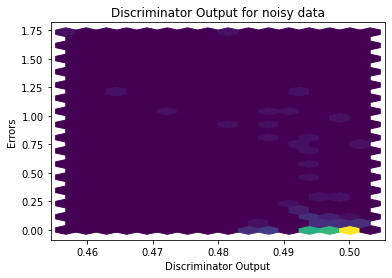

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


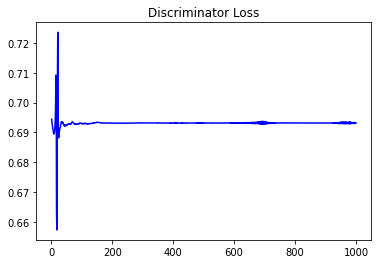

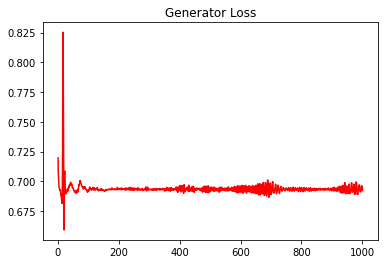

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.032245786197553875


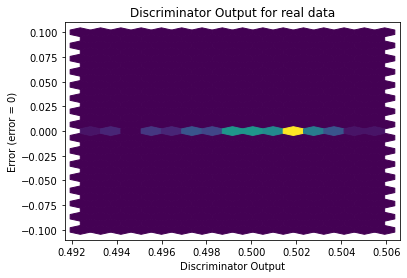

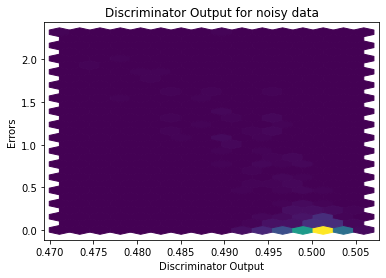

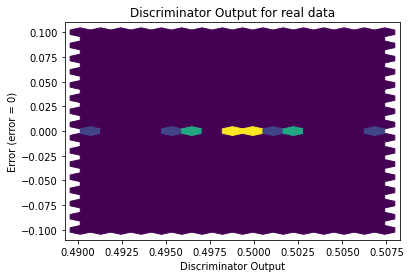

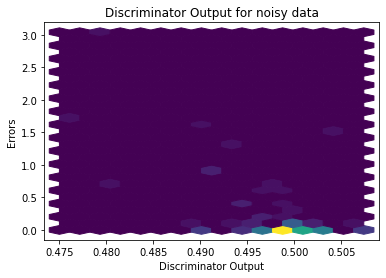

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2196]], requires_grad=True)
